In [1]:
import torch
import torch.nn as nn
import torchvision as tv
from torch.autograd import Variable
import tqdm
import matplotlib.pyplot as plt
import random
import math
import time
import pandas as pd
import numpy as np
from PIL import Image

import torch
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms
import os
import random


In [2]:
brain = os.listdir('data/image/')

In [3]:
brain_img = Image.open('data/image/'+brain[4])

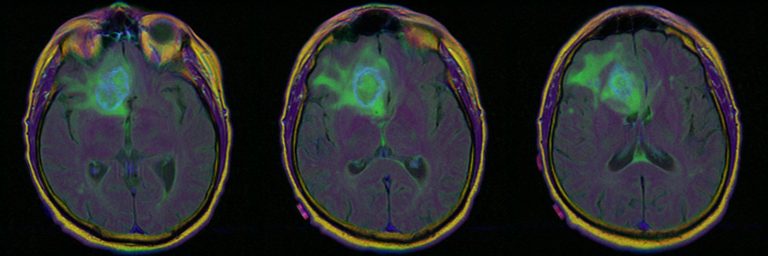

In [4]:
brain_img

In [5]:
tumor_img = Image.open('data/mask/'+brain[4][:-4]+'_mask.tif')

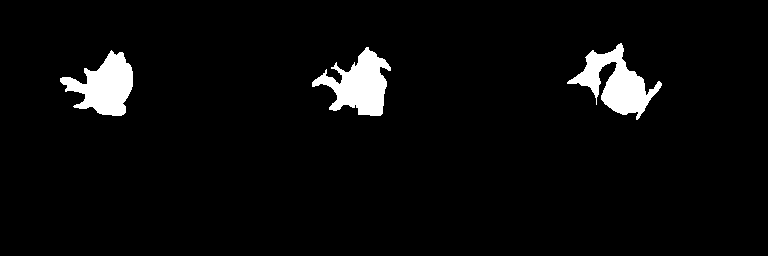

In [6]:
tumor_img

In [7]:
transform = transforms.Compose([
            # transforms.Resize((64,64)),
            transforms.ToTensor()
        ])

In [9]:
brain_tensor = transform(brain_img).detach().cpu().numpy()
tumor_tensor = transform(tumor_img).detach().cpu().numpy()

In [10]:
brain_tensor.shape

(3, 256, 768)

In [11]:


for i in range(brain_tensor.shape[1]):
    for j in range(brain_tensor.shape[2]):
        if tumor_tensor[0][i][j] == 0:
            brain_tensor[0][i][j]=0
            brain_tensor[1][i][j]=0
            brain_tensor[2][i][j]=0

In [16]:
from tqdm import tqdm

for img in tqdm(brain):
    
    brain_img = Image.open('data/image/'+img)
    tumor_img = Image.open('data/mask/'+img[:-4]+'_mask.tif')
    brain_tensor = transform(brain_img).detach().cpu().numpy()
    tumor_tensor = transform(tumor_img).detach().cpu().numpy()
    
    for i in range(brain_tensor.shape[1]):
        for j in range(brain_tensor.shape[2]):
            if tumor_tensor[0][i][j] == 0:
                brain_tensor[0][i][j]=0
                brain_tensor[1][i][j]=0
                brain_tensor[2][i][j]=0
    tensor = torch.tensor(brain_tensor)
    pil_image = to_pil(tensor)
    pil_image.save('data/tumor/'+img)

100%|██████████████████████████████████████████████████████████████████████████████| 3929/3929 [25:50<00:00,  2.53it/s]


In [12]:
to_pil = transforms.ToPILImage()

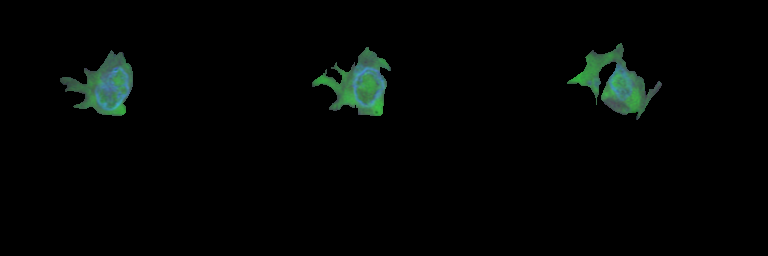

In [14]:
tensor = torch.tensor(brain_tensor)
pil_image = to_pil(tensor)
pil_image